In [10]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [92]:
from ucimlrepo import fetch_ucirepo 
  
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features 
y = heart_disease.data.targets 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [38]:
heart_disease = pd.read_csv(url)

print(heart_disease.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [39]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [60]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [61]:
heart_disease.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

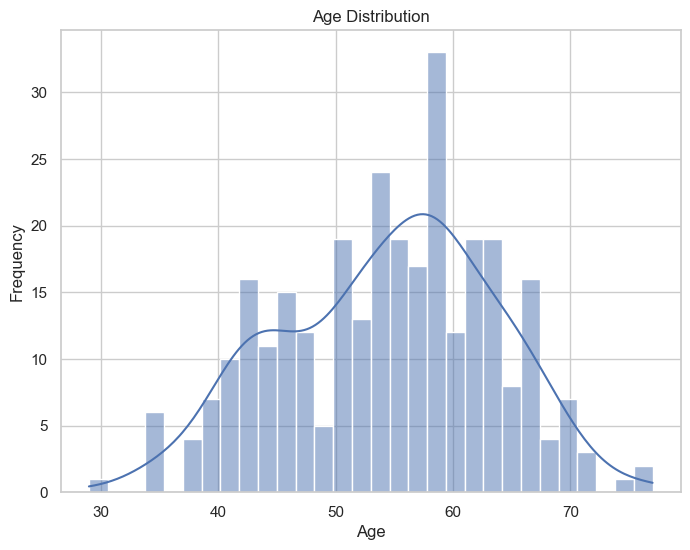

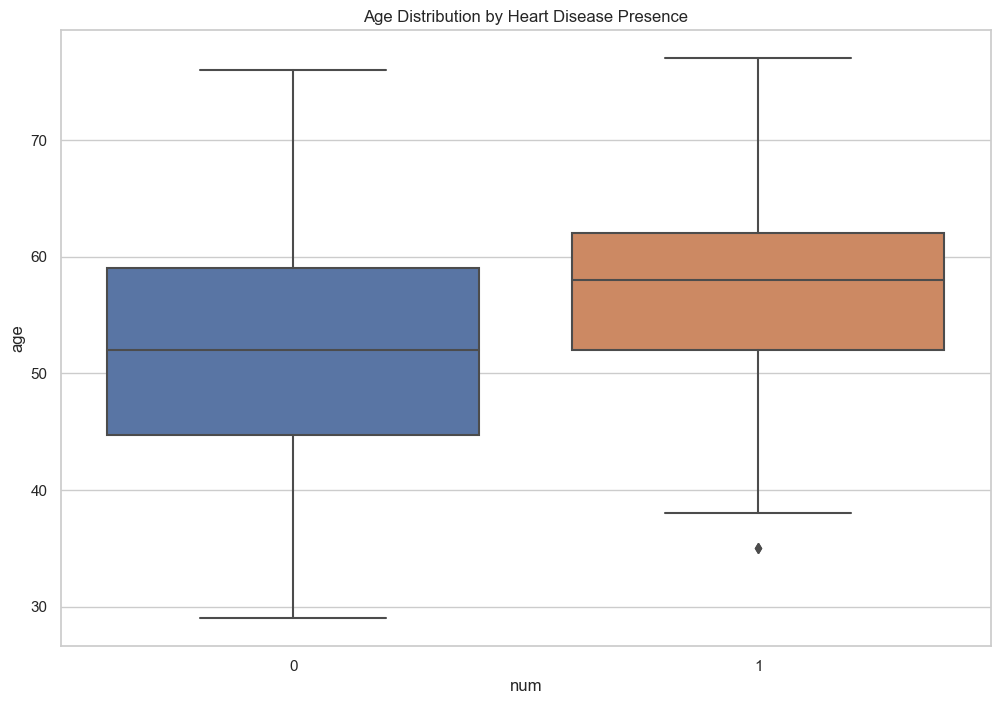

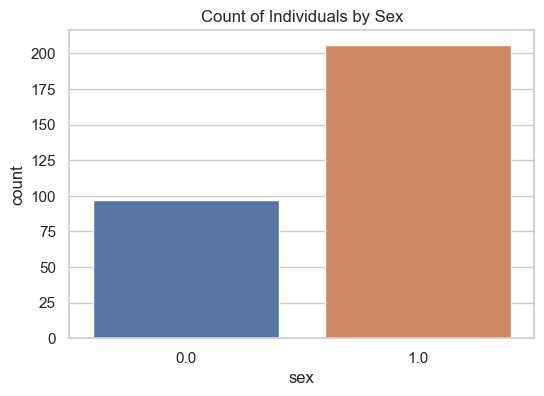

In [76]:
plt.figure(figsize=(8,6))
sns.histplot(heart_disease['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

numeric_data = heart_disease.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,8))
sns.boxplot(x='num', y='age', data=heart_disease)
plt.title('Age Distribution by Heart Disease Presence')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=heart_disease)
plt.title('Count of Individuals by Sex')
plt.show()

In [78]:
from sklearn.model_selection import train_test_split

num_imputer = SimpleImputer(strategy='mean')
numerical_features = heart_disease.select_dtypes(include=[np.number]).columns
heart_disease[numerical_features] = num_imputer.fit_transform(heart_disease[numerical_features])

categorical_features = heart_disease.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
heart_disease[categorical_features] = cat_imputer.fit_transform(heart_disease[categorical_features])

print("Missing values after imputation:")
print(heart_disease.isnull().sum())

Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


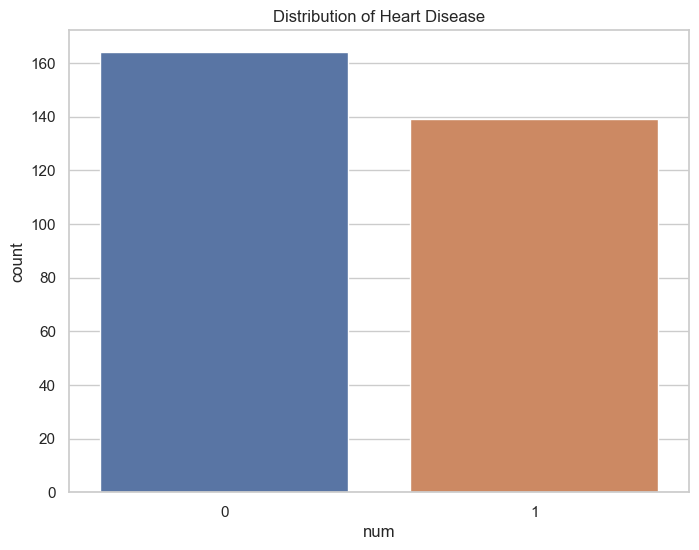

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_disease, x='num')
plt.title('Distribution of Heart Disease')
plt.show()

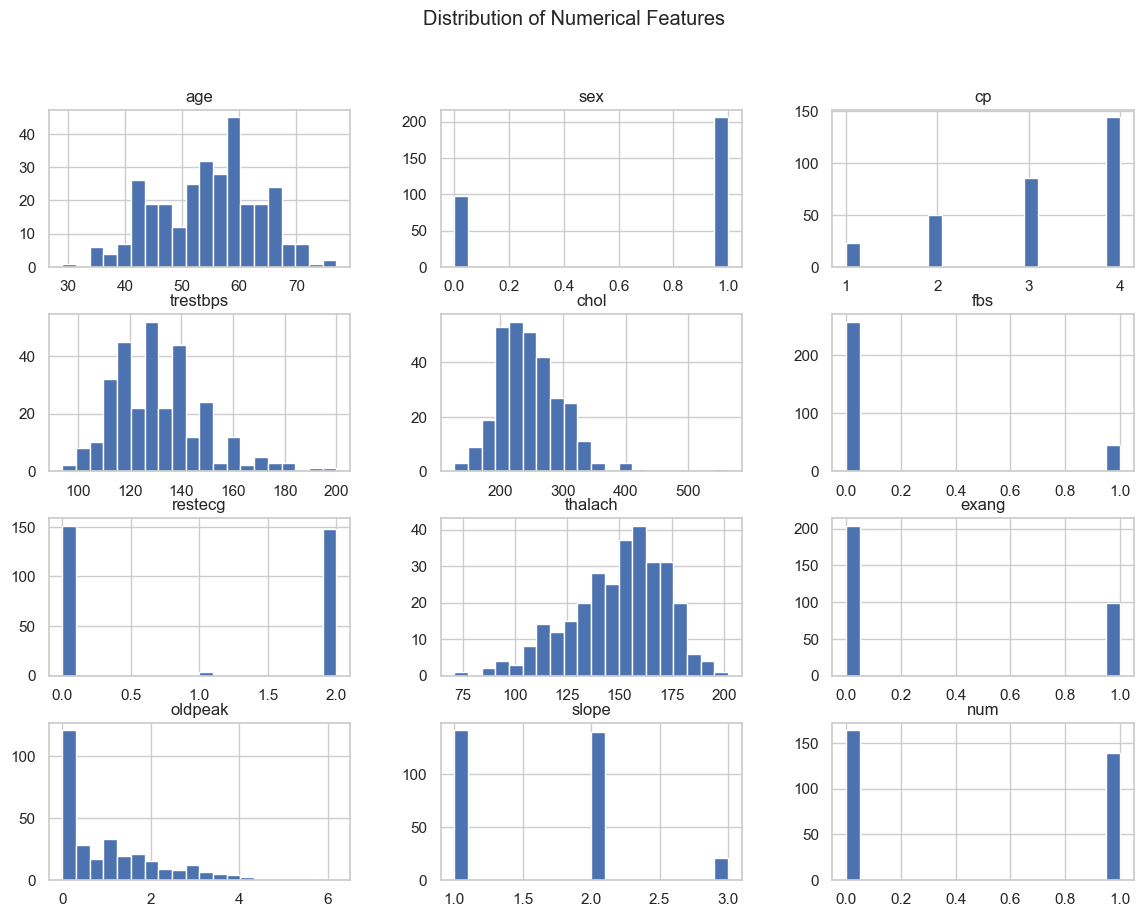

In [75]:
heart_disease[numerical_features].hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [66]:
heart_disease['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE

X = heart_disease.drop('num', axis=1)
y = heart_disease['num']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Class distribution before SMOTE:\n{y.value_counts()}")
print(f"Class distribution after SMOTE:\n{y_resampled.value_counts()}")

Class distribution before SMOTE:
0    164
1    139
Name: num, dtype: int64
Class distribution after SMOTE:
0    164
1    164
Name: num, dtype: int64


In [68]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

print(f"Class distribution before undersampling:\n{y.value_counts()}")
print(f"Class distribution after undersampling:\n{y_resampled.value_counts()}")

Class distribution before undersampling:
0    164
1    139
Name: num, dtype: int64
Class distribution after undersampling:
0    139
1    139
Name: num, dtype: int64


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = heart_disease.drop('num', axis=1) 
y = heart_disease['num']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.8688524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[26  3]
 [ 5 27]]


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True, False]  
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import classification_report
print("Classification Report with Grid Search Best Model:")
print(classification_report(y_test, y_pred_best))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report with Grid Search Best Model:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
[[27  2]
 [ 4 28]]


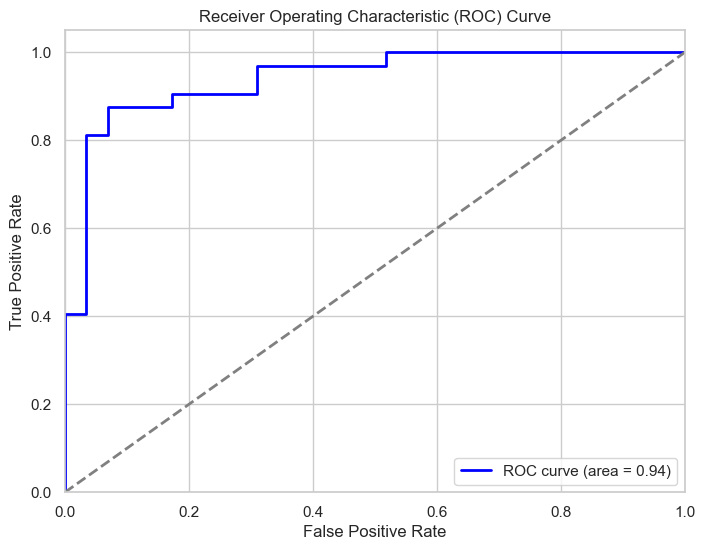

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (heart disease presence)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

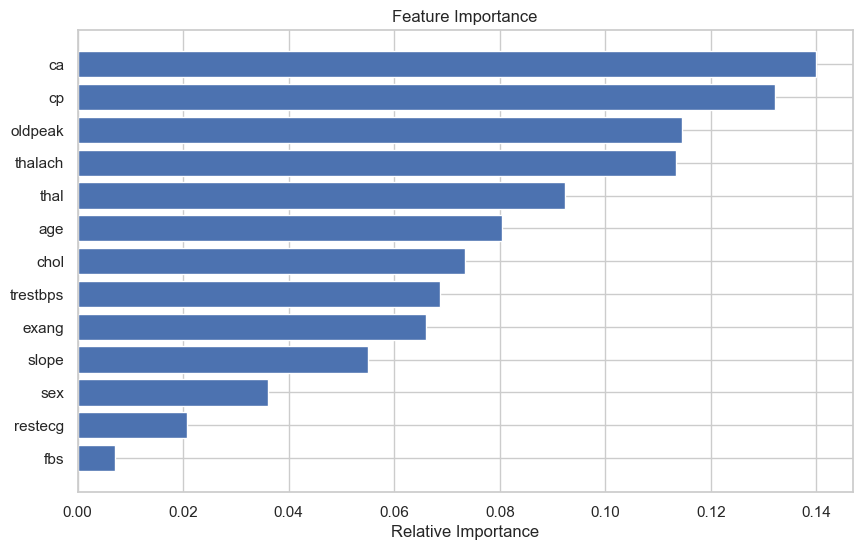

In [83]:
importances = grid_search.best_estimator_.feature_importances_

indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), heart_disease.columns[indices])
plt.xlabel('Relative Importance')
plt.show()

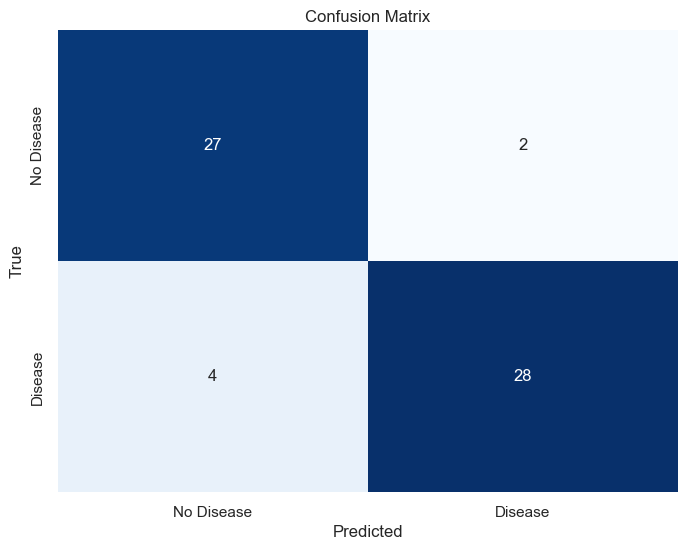

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, grid_search.best_estimator_.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [85]:
from sklearn.metrics import classification_report

report = classification_report(y_test, grid_search.best_estimator_.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

